In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
import numpy as np 
from sklearn.tree import DecisionTreeClassifier 
from graphviz import Source
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix


In [2]:
import pandas as pd
iris_pd = pd.DataFrame(iris.data, columns = iris.feature_names)

In [3]:
from sklearn.preprocessing import LabelEncoder 

le = LabelEncoder()
le.fit(iris.target_names)

le.classes_

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
iris_pd['species'] = le.inverse_transform(iris.target)
iris_pd.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:

X_train, X_test, y_train, y_test = train_test_split(feature_data, iris.target, 
                                                   test_size=0.2, random_state=13,
                                                   stratify = iris.target)

NameError: name 'feature_data' is not defined

## feature data

In [42]:
feature_data = iris.data[:,2:] # iris 꽃을 분류하기 위한 feature는 petal length/ width로 확정 

In [44]:

np.unique(y_test, return_counts=True)

(array([0, 1, 2]), array([10, 10, 10], dtype=int64))

### max_depth=2, random_state=13

In [45]:


iris_tree  = DecisionTreeClassifier(max_depth=2, random_state=13)
iris_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=13, splitter='best')

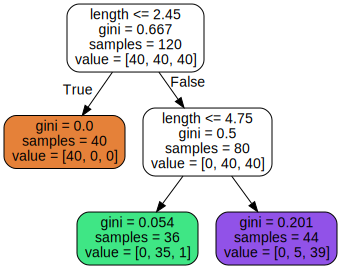

In [46]:


Source(export_graphviz(iris_tree, feature_names=['length','width'],
                      rounded=True, filled=True))

In [12]:


y_pred_tr = iris_tree.predict(X_train)
accuracy_score(y_train, y_pred_tr)

0.95

In [13]:
y_pred_test = iris_tree.predict(X_test)
accuracy_score(y_test, y_pred_test)

0.9666666666666667

In [14]:

confusion_matrix(y_test, y_pred_test)

array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  0, 10]], dtype=int64)

In [14]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_regions(X, y, classifier, resolution = 0.02):

    #ë§ˆì»¤ì™€ ì»¬ëŸ¬ë§µì„ ì„¤ì •
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    #ê²°ì • ê²½ê³„ë¥¼ ê·¸ë¦¼
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha = 0.3, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, c1 in enumerate(np.unique(y)):
        plt.scatter(x = X[y == c1, 0],
                    y = X[y == c1, 1],
                    alpha = 0.8,
                    c=colors[idx],
                    marker = markers[idx],
                    label = c1,
                    edgecolor = 'black')

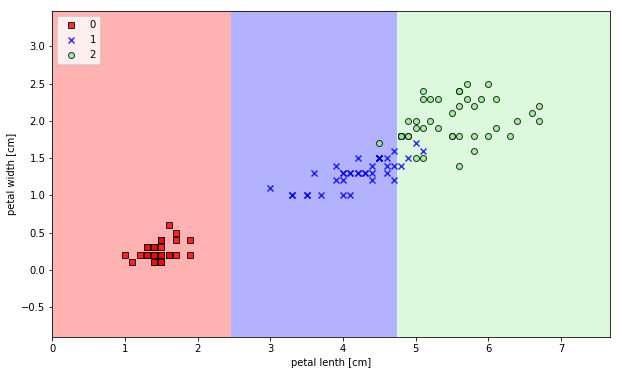

In [16]:
plt.figure(figsize=(10,6))
plot_decision_regions(X=X_train, y=y_train, classifier=iris_tree)

plt.xlabel('petal lenth [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')

plt.show()

### max_depth=4, random_state=13

In [49]:
iris_tree  = DecisionTreeClassifier(max_depth=4, random_state=13)
iris_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=13, splitter='best')

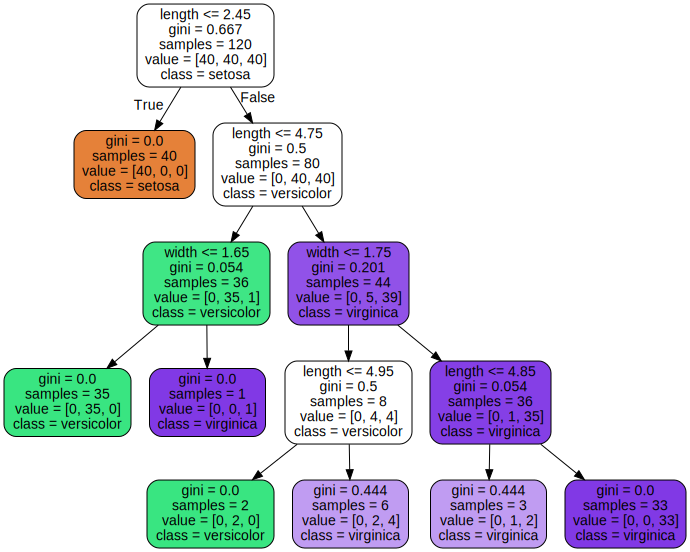

In [50]:
Source(export_graphviz(iris_tree, feature_names=['length', 'width'],
                      class_names=iris.target_names, rounded=True,
                      filled = True))

In [18]:
y_pred_tr = iris_tree.predict(X_train)
y_pred_test = iris_tree.predict(X_test)

print(accuracy_score(y_train, y_pred_tr))
print(accuracy_score(y_test, y_pred_test))

0.975
1.0


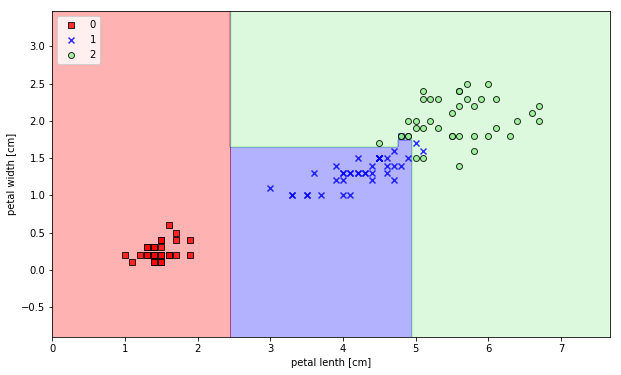

In [19]:
plt.figure(figsize=(10,6))
plot_decision_regions(X=X_train, y=y_train, classifier=iris_tree)

plt.xlabel('petal lenth [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')

plt.show()

### iris.data

In [18]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, 
                                                   test_size=0.2, random_state=13,
                                                   stratify = iris.target)

### max_depth의 제약이 없는 경우

In [19]:
iris_tree  = DecisionTreeClassifier(random_state=13)
iris_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=13, splitter='best')

### decision tree 시각화

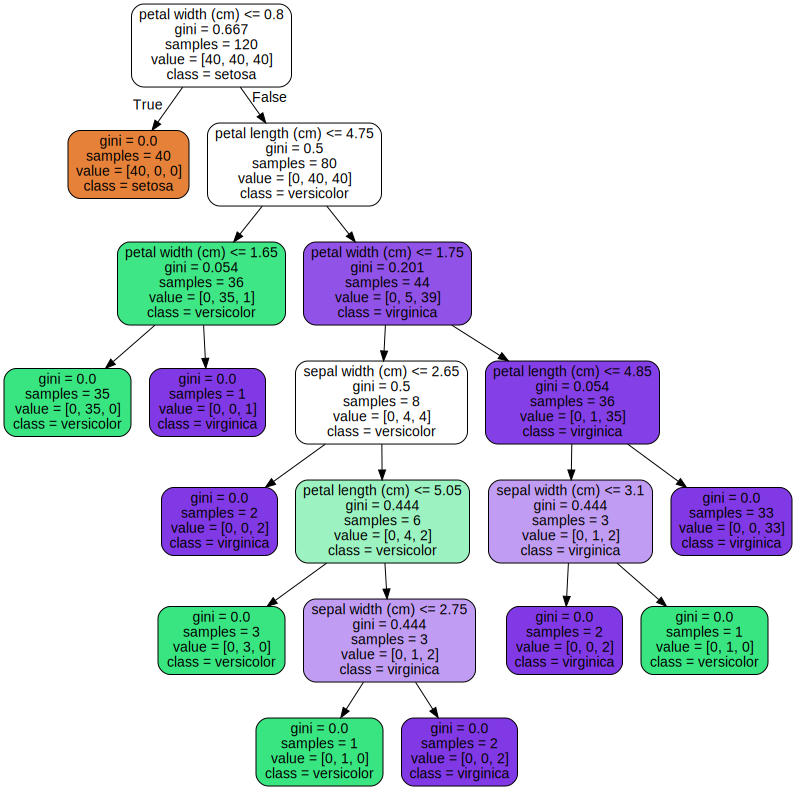

In [20]:
Source(export_graphviz(iris_tree, feature_names=iris.feature_names,
                      class_names=iris.target_names, rounded=True,
                      filled = True))

### 제약이 없는 경우 정확도 !

In [21]:
y_pred_tr = iris_tree.predict(X_train)
y_pred_test = iris_tree.predict(X_test)

print(accuracy_score(y_train, y_pred_tr))
print(accuracy_score(y_test, y_pred_test))

1.0
0.9666666666666667


### 혼돈행렬 !! 

In [22]:
confusion_matrix(y_test, y_pred_test)

array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  0, 10]], dtype=int64)

## max_depth=3인 경우 

In [23]:
iris_tree  = DecisionTreeClassifier(max_depth=3, random_state=13)
iris_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=13, splitter='best')

### decision tree 시각화 

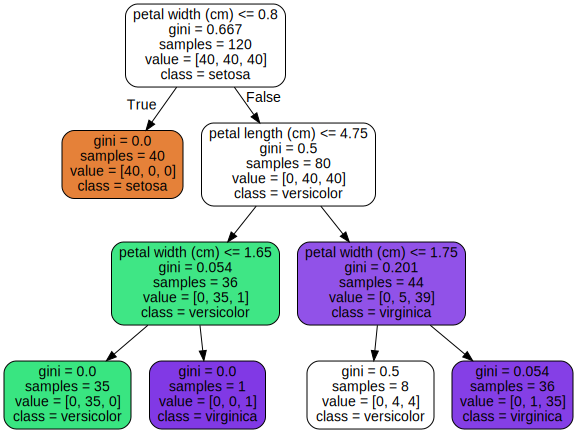

In [24]:
Source(export_graphviz(iris_tree, feature_names=iris.feature_names,
                      class_names=iris.target_names, rounded=True,
                      filled = True))

#### 3인 경우 정확도 

In [25]:
y_pred_tr = iris_tree.predict(X_train)
y_pred_test = iris_tree.predict(X_test)

print(accuracy_score(y_train, y_pred_tr))
print(accuracy_score(y_test, y_pred_test))

0.9583333333333334
1.0


### 혼돈행렬 

In [26]:
confusion_matrix(y_test, y_pred_test)

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 10]], dtype=int64)

In [38]:
iris_tree  = DecisionTreeClassifier(max_depth=4, random_state=13)
iris_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=13, splitter='best')

In [39]:
y_pred_tr = iris_tree.predict(X_train)
y_pred_test = iris_tree.predict(X_test)

print(accuracy_score(y_train, y_pred_tr))
print(accuracy_score(y_test, y_pred_test))

0.975
0.9666666666666667


In [40]:
confusion_matrix(y_test, y_pred_test)

array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  0, 10]], dtype=int64)

In [27]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [6, 8, 10, 12, 16, 20, 24]
         }

grid_cv = GridSearchCV(iris_tree, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼파라미터: ', grid_cv.best_params_)

# GridSearchCV 객체의 cv_results_ 속성을 데이터 프레임으로 생성
scores_df = pd.DataFrame(grid_cv.cv_results_)
scores_df[['rank_test_score', 'params','mean_train_score', 'mean_test_score',  'split0_test_score',
           'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score']]

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치: 0.9250
GridSearchCV 최적 하이퍼파라미터:  {'max_depth': 6}


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.0s finished


KeyError: "['mean_train_score'] not in index"

In [34]:
max_depths = [ 1, 3, 5, 7, 9, 11]

for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=13)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print('max_depth = {0} 정확도 : {1:.4f}'.format(depth, accuracy))

max_depth = 1 정확도 : 0.6667
max_depth = 3 정확도 : 1.0000
max_depth = 5 정확도 : 0.9667
max_depth = 7 정확도 : 0.9667
max_depth = 9 정확도 : 0.9667
max_depth = 11 정확도 : 0.9667


In [46]:
random_state = [9, 27, 45, 76, 100, 134]

for state in random_state:
    dt_clf = DecisionTreeClassifier(max_depth=3, random_state=state)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print('random_state = {0} 정확도 : {1:.4f}'.format(state, accuracy))

random_state = 9 정확도 : 1.0000
random_state = 27 정확도 : 1.0000
random_state = 45 정확도 : 1.0000
random_state = 76 정확도 : 1.0000
random_state = 100 정확도 : 1.0000
random_state = 134 정확도 : 1.0000
